#Solucion de sistemas de ecuaciones lineales de dos variables

Al completar este laboratorio, podrás utilizar habilidades básicas de programación con Python y el paquete `NumPy` para resolver sistemas de ecuaciones lineales. En este cuaderno, realizarás las siguientes acciones:

- Utilizar el paquete de álgebra lineal de `NumPy` para encontrar las soluciones del sistema de ecuaciones lineales.



## Paquetes
Importar el paquete `NumPy` para acceder a sus funciones.



In [3]:
import numpy as np

<a name='1'></a>
## 1 - Representacion y resolucion de sistemas de ecuaciones lineales como matrices

Un **sistema de ecuaciones lineales** (o **sistema lineal**) es un conjunto de una o más ecuaciones lineales que involucran las mismas variables. Por ejemplo:

$$\begin{cases}
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$


Es un sistema de dos ecuaciones con dos variables desconocidas $x_1$, $x_2$. **Resolver** un sistema de ecuaciones lineales significa encontrar valores para las variables $x_1$, $x_2$ de manera que todas sus ecuaciones se satisfagan simultáneamente.

Un sistema lineal es **inconsistente** si no tiene solución; de lo contrario, se dice que es **consistente**. Un sistema consistente puede tener una o un número infinito de soluciones.

<br>


### Resolución de Sistemas de Ecuaciones Lineales usando Matrices

Los sistemas lineales con dos ecuaciones son fáciles de resolver manualmente, pero al prepararse para casos más complicados, investigarás algunas técnicas de solución.

El paquete de álgebra lineal de `NumPy` proporciona una manera rápida y confiable de resolver el sistema de ecuaciones lineales mediante la función `np.linalg.solve(A, b)`. Aquí, $A$ es una matriz, donde cada fila representa una ecuación en el sistema, y cada columna corresponde a la variable $x_1$, $x_2$. Por otro lado, $b$ es un arreglo unidimensional de los coeficientes libres (lado derecho). Puedes encontrar más información sobre la función `np.linalg.solve()` en la [documentación](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

Dado el sistema de ecuaciones lineales $(1)$, puedes establecer la matriz $A$ y el arreglo unidimensional $b$ de la siguiente manera:


In [11]:
A = np.array([
        [2, 1],
        [4, 3]
    ], dtype=np.dtype(float))

b = np.array([6, 14], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[2. 1.]
 [4. 3.]]

Array b:
[ 6. 14.]


Verifica las dimensiones de $A$ y $b$ utilizando el atributo `shape` (también puedes usar `np.shape()` como alternativa):

In [12]:
print(f"Shape of A: {A.shape}")
print(f"Shape of b: {b.shape}")

print(f"\n")

print(f"Shape of A: {np.shape(A)}")
print(f"Shape of A: {np.shape(b)}")

Shape of A: (2, 2)
Shape of b: (2,)


Shape of A: (2, 2)
Shape of A: (2,)


Ahora simplemente utiliza la función `np.linalg.solve(A, b)` para encontrar la solución del sistema $(1)$. El resultado se guardará en el arreglo unidimensional $x$. Los elementos corresponderán a los valores de $x_1$ y $x_2$:

In [13]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [2. 2.]


Intenta sustituir esos valores de $x_1$ y $x_2$ en el sistema original de ecuaciones para verificar su consistencia.

### Representación Gráfica de la Solución

Una ecuación lineal en dos variables (aquí, $x_1$ y $x_2$) se representa geométricamente por una línea en la que los puntos $(x_1, x_2)$ forman la colección de soluciones de la ecuación. Esto se llama el **gráfico de la ecuación lineal**. En el caso del sistema de dos ecuaciones, habrá dos líneas correspondientes a cada una de las ecuaciones, y la solución será el punto de intersección de esas líneas.

En el siguiente código, definirás una función `plot_lines()` para trazar las líneas y la usarás más adelante para representar la solución que encontraste anteriormente. No te preocupes si el código en la celda siguiente no es claro; en esta etapa, no es importante comprender este código.

In [14]:
A_system = np.hstack((A, b.reshape((2, 1))))

print(A_system)

[[ 2.  1.  6.]
 [ 4.  3. 14.]]


In [15]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]

    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b)
        ax.plot(solution[0], solution[1], '-o', mfc='none',
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

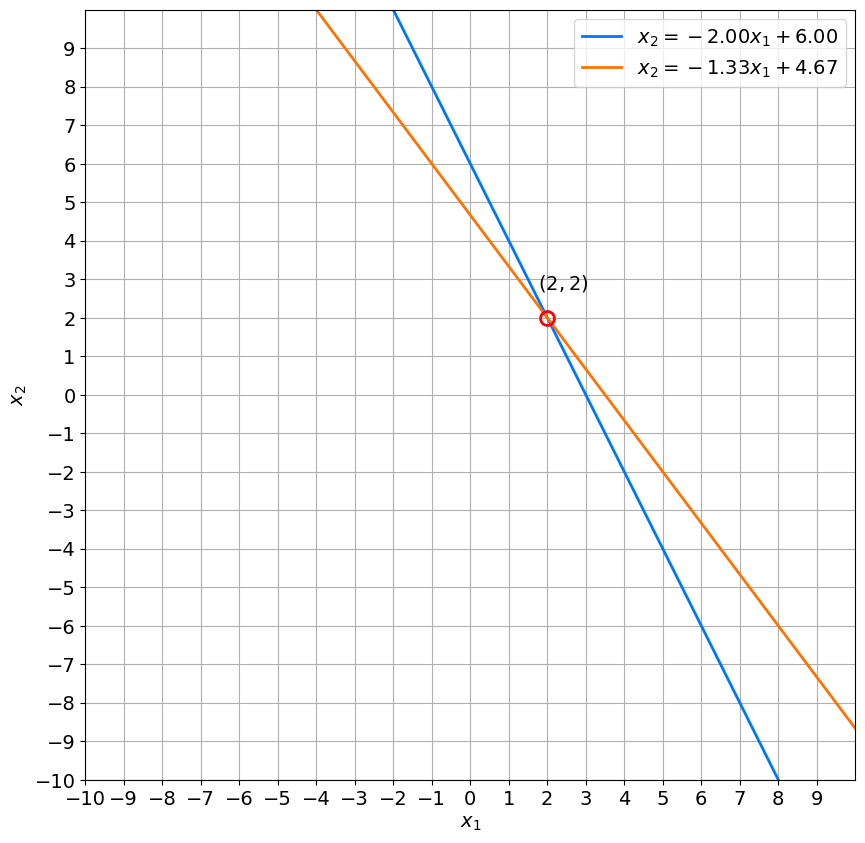

In [16]:
plot_lines(A_system)